In [ ]:
import tensorflow as tf

# Check GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("Using GPU: ", tf.test.gpu_device_name())


Num GPUs Available:  0
Using GPU:  


In [ ]:
!pip install ultralytics tensorflow opencv-python matplotlib scikit-learn --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 845.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.3 MB/s eta 0:00:00


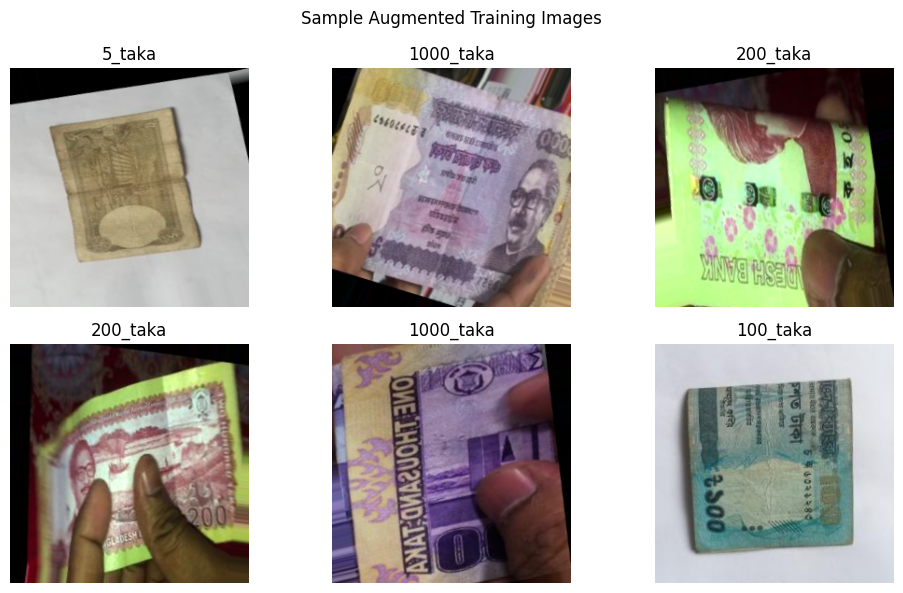

In [ ]:
# Show original augmented images
x_batch, y_batch = next(train_data)
plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_batch[i])
    plt.title(class_names[np.argmax(y_batch[i])])
    plt.axis('off')
plt.suptitle("Sample Augmented Training Images")
plt.tight_layout()
plt.show()



image 1/1 /content/dataset/data/Detection/test/images/893c6bcc-d0a8-4f78-a63a-7e641ca9c7f6_jpg.rf.8a40e2c3d5ff52001a2a1c90fce645f4.jpg: 640x640 1 Taka, 9.7ms
Speed: 2.2ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


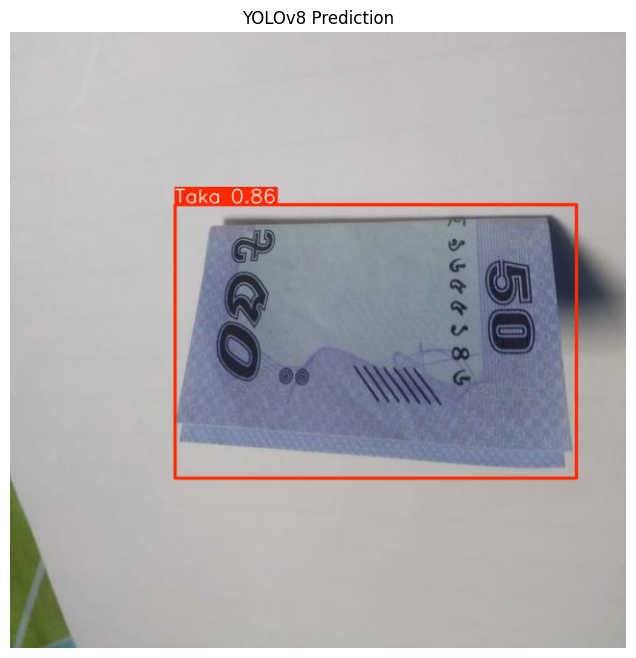

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model = YOLO("runs/detect/train4/weights/best.pt")  # or 'last.pt'

# Predict on a custom image
results = model.predict("/content/dataset/data/Detection/test/images/893c6bcc-d0a8-4f78-a63a-7e641ca9c7f6_jpg.rf.8a40e2c3d5ff52001a2a1c90fce645f4.jpg", conf=0.5)

# Visualize
for r in results:
    img = r.plot()  # with boxes and labels
    plt.figure(figsize=(10, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.title("YOLOv8 Prediction")
    plt.show()


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
# ✅ STEP 1: Install YOLOv8
!pip install ultralytics --quiet
from ultralytics import YOLO
import os
import cv2
from tqdm import tqdm
import shutil

# ✅ STEP 2: Load the trained YOLOv8 model
yolo_model = YOLO("/content/best.pt")  # Update with your actual YOLOv8 weights path

# ✅ STEP 3: Define paths
base_input_dir = "/content/drive/MyDrive/Recognition"  # Recognition (original full images)
base_output_dir = "/content/drive/MyDrive/Recognition_Cropped"  # Where cropped images will go

# ✅ STEP 4: Function to crop currency notes
def crop_currency_with_yolo(input_dir, output_dir):
    os.makedirs(output_dir, exist_ok=True)

    for split in ["train", "test", "validation"]:
        print(f"\n🌀 Processing split: {split}")
        input_split_path = os.path.join(input_dir, split)
        output_split_path = os.path.join(output_dir, split)
        os.makedirs(output_split_path, exist_ok=True)

        for class_name in os.listdir(input_split_path):
            input_class_dir = os.path.join(input_split_path, class_name)
            output_class_dir = os.path.join(output_split_path, class_name)
            os.makedirs(output_class_dir, exist_ok=True)

            for img_name in tqdm(os.listdir(input_class_dir), desc=class_name):
                img_path = os.path.join(input_class_dir, img_name)
                image = cv2.imread(img_path)

                # Run detection on the image
                results = yolo_model.predict(img_path, conf=0.3, verbose=False)

                if results and len(results[0].boxes) > 0:
                    box = results[0].boxes[0].xyxy[0].cpu().numpy().astype(int)
                    x1, y1, x2, y2 = box
                    cropped = image[y1:y2, x1:x2]
                    cropped = cv2.resize(cropped, (224, 224))  # match ResNet input size
                    output_path = os.path.join(output_class_dir, img_name)
                    cv2.imwrite(output_path, cropped)

crop_currency_with_yolo(base_input_dir, base_output_dir)


In [1]:
!apt-get install unrar

from google.colab import files

uploaded = files.upload()  # Select runs.rar from your PC


!mkdir /content/runs
!unrar x /content/runs.rar /content/runs/


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


Saving runs.rar to runs.rar

UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/runs.rar

Creating    /content/runs/runs                                        OK
Creating    /content/runs/runs/detect                                 OK
Creating    /content/runs/runs/detect/train                           OK
Extracting  /content/runs/runs/detect/train/args.yaml                      0%  OK 
Creating    /content/runs/runs/detect/train2                          OK
Extracting  /content/runs/runs/detect/train2/args.yaml                     0%  OK 
Extracting  /content/runs/runs/detect/train2/BoxF1_curve.png               0%  OK 
Extracting  /content/runs/runs/detect/train2/BoxPR_curve.png               0%  OK 
Extracting  /content/runs/runs/detect/train2/BoxP_curve.png                1%  OK 
Extracting  /content/runs/runs/detect/train2/BoxR_curve.png                1%  OK 
Extracting  /cont

In [2]:
# ✅ STEP 1: Install Required Libraries
!pip install -q ultralytics tensorflow opencv-python matplotlib

# ✅ STEP 2: Import Libraries
import cv2
import numpy as np
import tensorflow as tf
from ultralytics import YOLO
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralyti

In [38]:
# ✅ STEP 3: Load Models
yolo_model = YOLO('/content/runs/runs/detect/train2/weights/best.pt')  # Replace with your YOLO model path
resnet_model = tf.keras.models.load_model('/content/Resnet_SplitDataset.h5')  # Replace with your ResNet model path

# ✅ STEP 4: Class Labels (adjust as per your model)
class_names = ['1000_Taka', '100_Taka', '10_Taka', '20_Taka', '2_Taka', '500_Taka', '50_Taka', '5_Taka']


0: 640x640 1 Taka, 219.5ms
Speed: 3.6ms preprocess, 219.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
✅ Detected: 1000_Taka


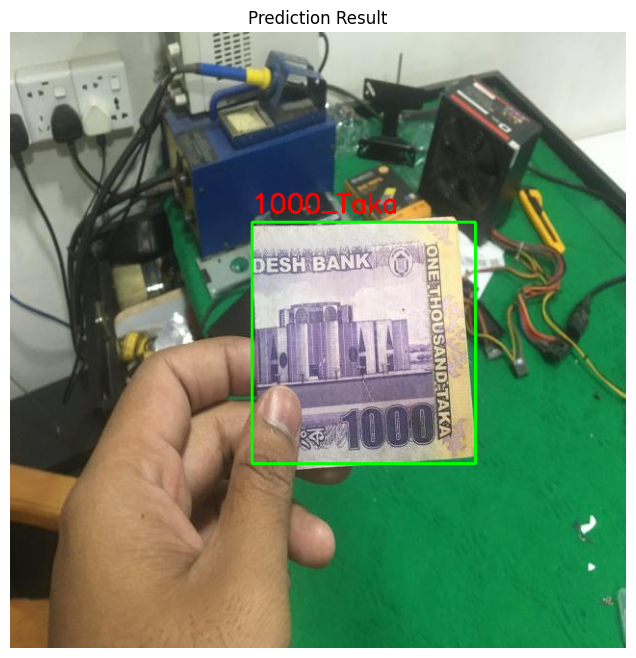

In [58]:
# ✅ STEP 5: Run Detection → Crop → Classify
def detect_crop_classify(image_path):
    # Read image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # YOLOv8 detection
    results = yolo_model(image_rgb)
    boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)

    if len(boxes) == 0:
        print("❌ No currency note detected!")
        return

    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = box
        cropped = image_rgb[y1:y2, x1:x2]

        # Resize for ResNet (your input size)
        resized = cv2.resize(cropped, (256 ,117))
        resized = resized / 255.0
        input_img = np.expand_dims(resized, axis=0)

        # Classify with ResNet
        prediction = resnet_model.predict(input_img)
        predicted_class = class_names[np.argmax(prediction)]
        confidence = np.max(prediction) * 100

        # Show prediction
        print(f"✅ Detected: {predicted_class}")

        # Draw Box + Label
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image_rgb, f"{predicted_class}", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Show Final Image
    plt.figure(figsize=(8, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title("Prediction Result")
    plt.show()

# ✅ STEP 6: Predict a Sample Image
detect_crop_classify('/content/IMG_0052_JPG.rf.ea090ba3a0519230ee5e13f71bd0e860.jpg')  # Replace with your test image path

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━

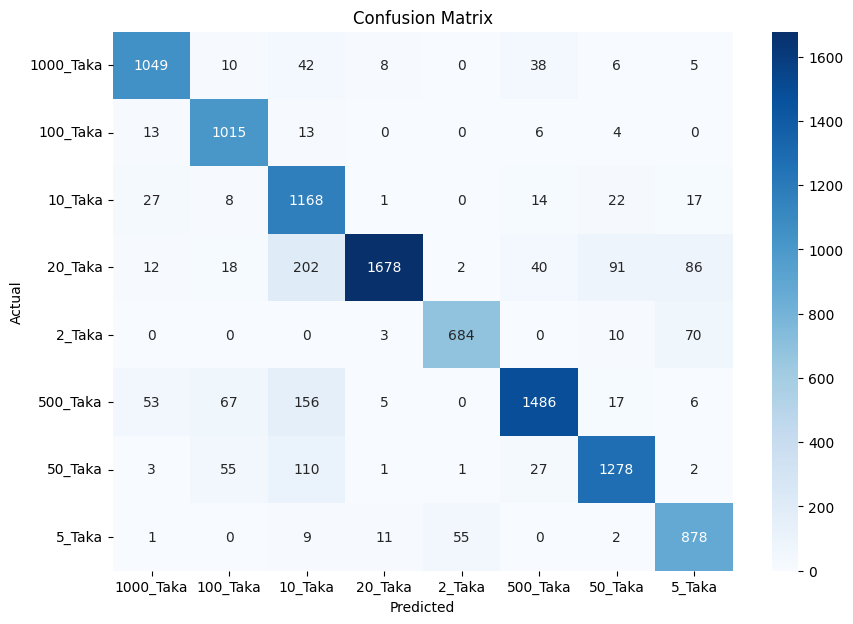

In [59]:
import os
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import load_img, img_to_array

true_labels = []
pred_labels = []

test_dir = "/content/dataset/split_dataset/test"

for class_name in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_name)
    for fname in os.listdir(class_path):
        fpath = os.path.join(class_path, fname)

        img = load_img(fpath, target_size=(117, 256))  # ✅ same size as training
        img = img_to_array(img) / 255.0
        img = np.expand_dims(img, axis=0)

        pred = resnet_model.predict(img)
        pred_class = class_names[np.argmax(pred)]

        true_labels.append(class_name)
        pred_labels.append(pred_class)

# 📋 Report
print("\n✅ Classification Report:\n")
print(classification_report(true_labels, pred_labels))

# 📊 Confusion Matrix
import seaborn as sns
cm = confusion_matrix(true_labels, pred_labels, labels=class_names)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
